# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Successfully downloaded image from: https://picsum.photos/800/600
Original image shape: (600, 800, 3)


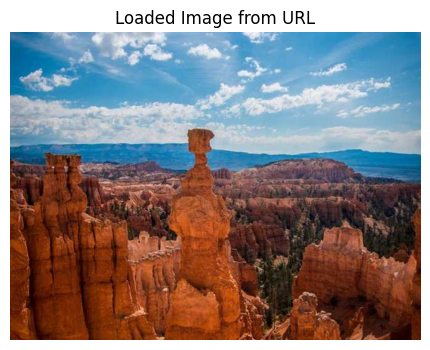

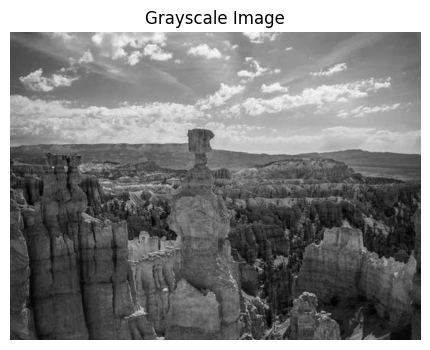

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64
import requests
image_url = "https://picsum.photos/800/600"

try:
    response = requests.get(image_url)
    response.raise_for_status()
    img = Image.open(io.BytesIO(response.content))
    print(f"Successfully downloaded image from: {image_url}")
except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
    base64_image = "iVBORw0KGgoAAAANSUhEUgAAAAEAAAABCAQAAAC1HAwCAAAAC0lEQVR42mNkYAAAAAYAAjCB0C8AAAAASUVORK5CYII="
    img_data = base64.b64decode(base64_image)
    img = Image.open(io.BytesIO(img_data))
    print("Falling back to base64 placeholder image.")

# Convert image to numpy array
# Ensure it's in a format suitable for processing (e.g., RGB or Grayscale)
original_img_rgb = np.array(img.convert('RGB'))

print("Original image shape:", original_img_rgb.shape)

plt.figure(figsize=(6, 4))
plt.imshow(original_img_rgb)
plt.title("Loaded Image from URL")
plt.axis("off")
plt.show()


gray_img = np.dot(original_img_rgb[...,:3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

plt.figure(figsize=(6, 4))
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

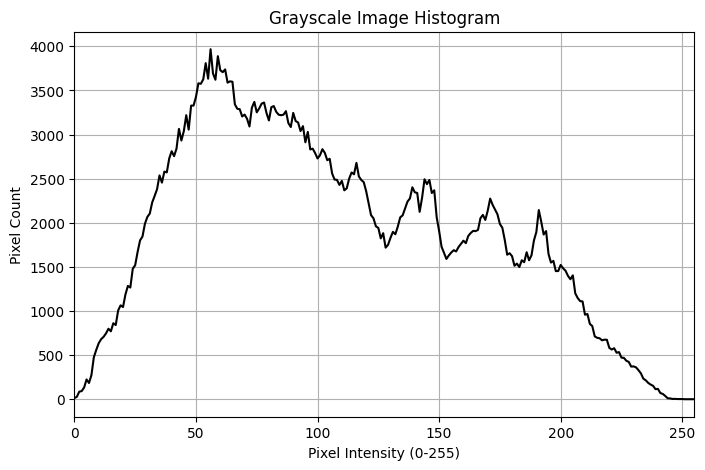

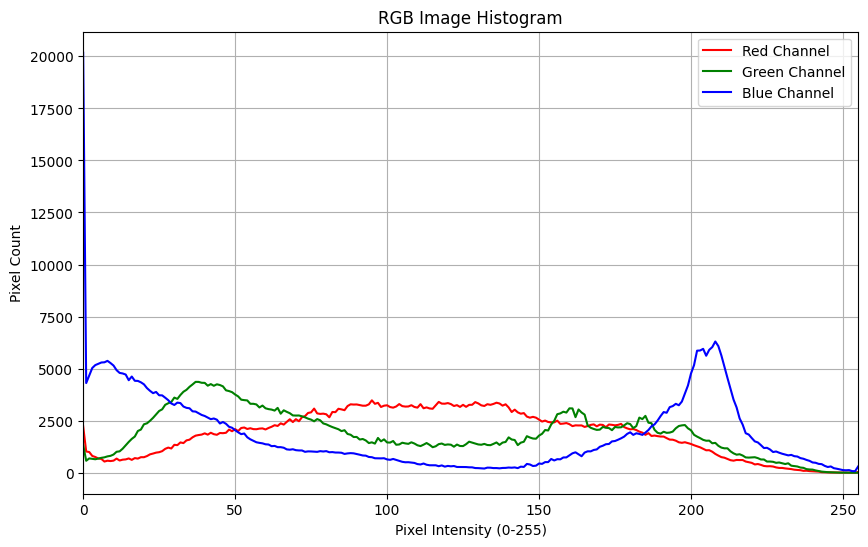

In [ ]:
# Part A: Grayscale Histogram

def gray_histogram(gray_img):
    """
    Computes the histogram of a grayscale image using pure NumPy loops.

    Args:
        gray_img (np.array): A non-normalized grayscale image (values 0-255).

    Returns:
        np.array: A 1D array representing the histogram, where index is intensity
                  and value is the count of pixels at that intensity.
    """
    # Initialize an array to store counts for each intensity level (0-255)
    histogram = np.zeros(256, dtype=int)

    # Iterate through each pixel in the grayscale image
    # Using nested loops to adhere to "pure NumPy loops" requirement
    # Although more optimized NumPy ways exist (e.g., np.bincount), this uses explicit loops.
    for row in range(gray_img.shape[0]):
        for col in range(gray_img.shape[1]):
            intensity = gray_img[row, col]
            histogram[intensity] += 1

    return histogram

# Calculate and plot grayscale histogram
gray_hist = gray_histogram(gray_img)

plt.figure(figsize=(8, 5))
plt.plot(gray_hist, color='black')
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Pixel Count')
plt.grid(True)
plt.xlim([0, 255])
plt.show()


# Part A: RGB Histogram

def rgb_histogram(rgb_img):
    """
    Computes the histogram for each channel of an RGB image using pure NumPy loops.

    Args:
        rgb_img (np.array): A non-normalized RGB image (values 0-255).

    Returns:
        tuple: A tuple containing three 1D NumPy arrays for Red, Green, and Blue histograms.
    """
    # Initialize arrays for Red, Green, Blue channels
    hist_r = np.zeros(256, dtype=int)
    hist_g = np.zeros(256, dtype=int)
    hist_b = np.zeros(256, dtype=int)

    # Iterate through each pixel
    for row in range(rgb_img.shape[0]):
        for col in range(rgb_img.shape[1]):
            # Get RGB values for the current pixel
            r, g, b = rgb_img[row, col]

            # Increment counts for each channel
            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1

    return hist_r, hist_g, hist_b

# Calculate RGB histograms
hist_r, hist_g, hist_b = rgb_histogram(original_img_rgb)

# Plot RGB histograms
plt.figure(figsize=(10, 6))
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')

plt.title('RGB Image Histogram')
plt.xlabel('Pixel Intensity (0-255)')
plt.ylabel('Pixel Count')
plt.legend()
plt.grid(True)
plt.xlim([0, 255])
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

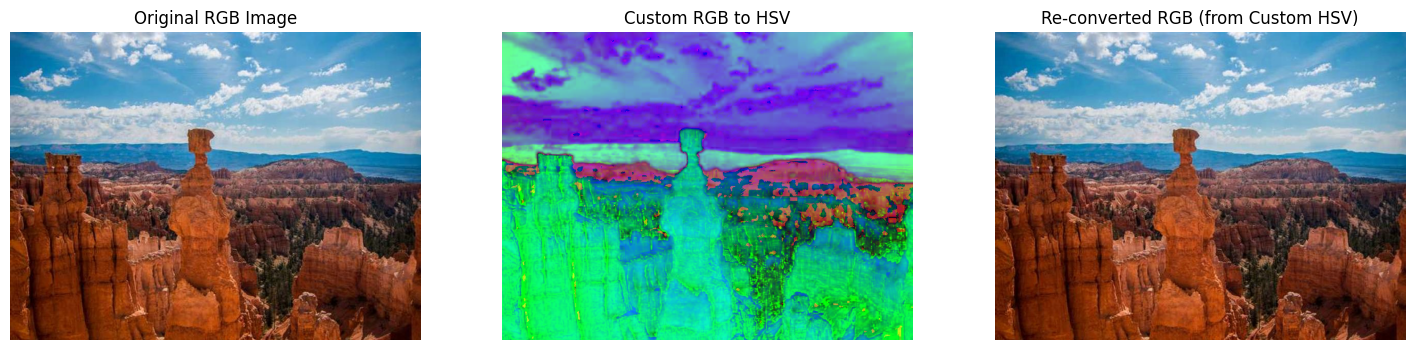

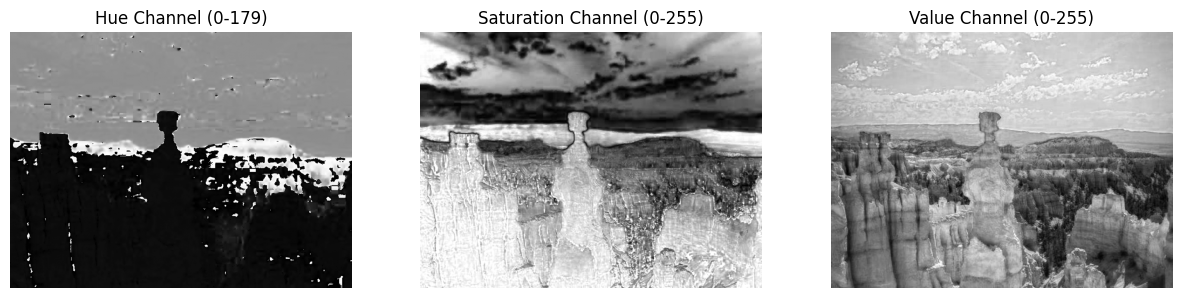

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 # Import OpenCV for testing the conversion

# Ensure original_img_rgb is available from previous cells
# If you restart the kernel, you might need to re-run the image loading cell (eed3244e)
if 'original_img_rgb' not in locals():
    print("Warning: original_img_rgb not found. Please run the image loading cell first.")
    # Fallback to a dummy image for execution if original_img_rgb is not present
    original_img_rgb = np.array([[[255, 0, 0], [0, 255, 0]], [[0, 0, 255], [128, 128, 128]]], dtype=np.uint8)

def rgb_to_hsv(rgb_img):
    """
    Converts a 0-255 RGB image to an HSV image using pure NumPy operations.
    The output HSV is non-normalized, compatible with OpenCV's 8-bit HSV (H: [0, 179], S,V: [0, 255]).

    Args:
        rgb_img (np.array): A NumPy array of shape (height, width, 3) representing
                            the RGB image with pixel values in the range [0, 255].

    Returns:
        np.array: A NumPy array of shape (height, width, 3) representing
                  the HSV image with H in [0, 179], S,V in [0, 255].
    """
    # Convert to float and normalize RGB values to [0, 1]
    rgb_float = rgb_img.astype(np.float32) / 255.0
    r, g, b = rgb_float[..., 0], rgb_float[..., 1], rgb_float[..., 2]

    C_max = np.maximum(np.maximum(r, g), b)
    C_min = np.minimum(np.minimum(r, g), b)
    Delta = C_max - C_min

    h = np.zeros_like(r)
    s = np.zeros_like(r)
    v = C_max.copy()

    # Calculate Hue (H)
    # Where Delta is 0, H is 0 (grayscale pixels)
    idx_delta_gt_0 = Delta > 0

    # C_max == r
    idx = idx_delta_gt_0 & (C_max == r)
    h[idx] = 60 * (((g[idx] - b[idx]) / Delta[idx]) % 6)

    # C_max == g
    idx = idx_delta_gt_0 & (C_max == g)
    h[idx] = 60 * (((b[idx] - r[idx]) / Delta[idx]) + 2)

    # C_max == b
    idx = idx_delta_gt_0 & (C_max == b)
    h[idx] = 60 * (((r[idx] - g[idx]) / Delta[idx]) + 4)

    # Ensure hue is non-negative (can happen due to modulo for small negative values)
    h[h < 0] += 360

    # Calculate Saturation (S)
    # Where C_max is 0, S is 0 (black pixels)
    idx_C_max_gt_0 = C_max > 0
    s[idx_C_max_gt_0] = Delta[idx_C_max_gt_0] / C_max[idx_C_max_gt_0]

    # Scale H, S, V to OpenCV 8-bit compatible ranges
    # H: [0, 179] (divide by 2 from [0, 359])
    # S: [0, 255]
    # V: [0, 255]
    hsv_img = np.stack([h / 2, s * 255, v * 255], axis=-1)

    return hsv_img.astype(np.uint8)


# --- Test the rgb_to_hsv function ---

# Convert the original RGB image to HSV using our function
hsv_converted = rgb_to_hsv(original_img_rgb)

# Convert the HSV image back to RGB using OpenCV's cvtColor
# This tests if our HSV output is compatible and correct
rgb_recon = cv2.cvtColor(hsv_converted, cv2.COLOR_HSV2RGB)

# Display the original, HSV, and re-converted RGB images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img_rgb)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(1, 3, 2)
# For visualization, HSV images are often converted back to RGB or displayed by channels
# Here, we'll display it as is, but it won't look like a normal color image
# For better understanding, one might display individual H, S, V channels
plt.imshow(hsv_converted)
plt.title('Custom RGB to HSV')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(rgb_recon)
plt.title('Re-converted RGB (from Custom HSV)')
plt.axis('off')

plt.show()

# Optional: Display individual HSV channels for better understanding
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(hsv_converted[..., 0], cmap='gray')
plt.title('Hue Channel (0-179)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(hsv_converted[..., 1], cmap='gray')
plt.title('Saturation Channel (0-255)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hsv_converted[..., 2], cmap='gray')
plt.title('Value Channel (0-255)')
plt.axis('off')

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
import numpy as np
import cv2 # For HSV to RGB conversion and potentially other utilities
import matplotlib.pyplot as plt

# Filter 1: "Sahara Sunset"
def sahara_sunset_filter(rgb_img):
    """
    Applies a 'Sahara Sunset' filter to an RGB image.
    This filter enhances warm tones, boosts saturation, and slightly increases contrast,
    ideal for desert landscapes or images with strong warm colors.

    Modifications:
    1. Saturation Boost: Converts RGB to HSV, increases the saturation (S) channel,
                        and converts back to RGB.
    2. Contrast Enhancement: Applies a linear contrast adjustment.
    3. Warm Color Tint: Slightly increases red and green channels to emphasize warm tones.

    Args:
        rgb_img (np.array): A 0-255 RGB image (height, width, 3).

    Returns:
        np.array: The filtered 0-255 RGB image.
    """
    # Ensure image is float for calculations to prevent clipping too early
    img_float = rgb_img.astype(np.float32)
    hsv_initial = rgb_to_hsv(rgb_img)
    h_channel, s_channel, v_channel = hsv_initial[..., 0], hsv_initial[..., 1], hsv_initial[..., 2]

    saturation_boost_factor = 1.3 # Increase saturation by 30%
    s_channel_boosted = np.clip(s_channel * saturation_boost_factor, 0, 255).astype(np.uint8)

    hsv_modified_s = np.stack([h_channel, s_channel_boosted, v_channel], axis=-1)
    # Convert back to RGB using OpenCV and then to float for further processing
    img_saturation_boosted = cv2.cvtColor(hsv_modified_s, cv2.COLOR_HSV2RGB).astype(np.float32)

    # --- 2. Contrast Enhancement ---
    contrast_alpha = 1.15 # Increase contrast by 15%
    # Adjust values around the midpoint (128) for contrast
    img_contrast_enhanced = np.clip((img_saturation_boosted - 128.0) * contrast_alpha + 128.0, 0, 255)

    # --- 3. Warm Color Tint (increase Red and Green channels more) ---
    red_boost = 15
    green_boost = 10

    img_tinted = img_contrast_enhanced.copy()
    img_tinted[..., 0] = np.clip(img_tinted[..., 0] + red_boost, 0, 255)   # Boost Red channel
    img_tinted[..., 1] = np.clip(img_tinted[..., 1] + green_boost, 0, 255) # Boost Green channel

    return img_tinted.astype(np.uint8)

# Filter 2: "Mystic Fog"
def mystic_fog_filter(rgb_img):
    """
    Applies a 'Mystic Fog' filter to an RGB image.
    This filter creates a cool, desaturated, and slightly muted effect,
    suitable for images aiming for an ethereal or melancholic mood.

    Modifications:
    1. Brightness Reduction: Decreases the overall brightness.
    2. Contrast Reduction: Softens the image by reducing contrast.
    3. Cool Color Tint: Adds a blue tint to the image.
    4. Desaturation: Reduces the overall color vibrancy.

    Args:
        rgb_img (np.array): A 0-255 RGB image (height, width, 3).

    Returns:
        np.array: The filtered 0-255 RGB image.
    """
    # Ensure image is float for calculations to prevent clipping too early
    img_float = rgb_img.astype(np.float32)

    # --- 1. Brightness Reduction ---
    brightness_offset = -30 # Decrease brightness by 30 intensity units
    img_darkened = np.clip(img_float + brightness_offset, 0, 255)

    # --- 2. Contrast Reduction ---
    contrast_alpha = 0.85 # Reduce contrast by 15%
    # Adjust values around the midpoint (128) for contrast
    img_contrast_reduced = np.clip((img_darkened - 128.0) * contrast_alpha + 128.0, 0, 255)

    # --- 3. Cool Color Tint (Add blue, slightly reduce red/green) ---
    blue_add = 40
    red_reduce = 15
    green_reduce = 10

    img_tinted = img_contrast_reduced.copy()
    img_tinted[..., 0] = np.clip(img_tinted[..., 0] - red_reduce, 0, 255)   # Reduce Red channel
    img_tinted[..., 1] = np.clip(img_tinted[..., 1] - green_reduce, 0, 255) # Reduce Green channel
    img_tinted[..., 2] = np.clip(img_tinted[..., 2] + blue_add, 0, 255)     # Boost Blue channel
    hsv_tinted = rgb_to_hsv(img_tinted.astype(np.uint8))
    h_channel, s_channel, v_channel = hsv_tinted[..., 0], hsv_tinted[..., 1], hsv_tinted[..., 2]

    desaturation_factor = 0.7 # Reduce saturation by 30%
    s_channel_desaturated = np.clip(s_channel * desaturation_factor, 0, 255).astype(np.uint8)

    hsv_final = np.stack([h_channel, s_channel_desaturated, v_channel], axis=-1)
    img_desaturated = cv2.cvtColor(hsv_final, cv2.COLOR_HSV2RGB)

    return img_desaturated.astype(np.uint8)

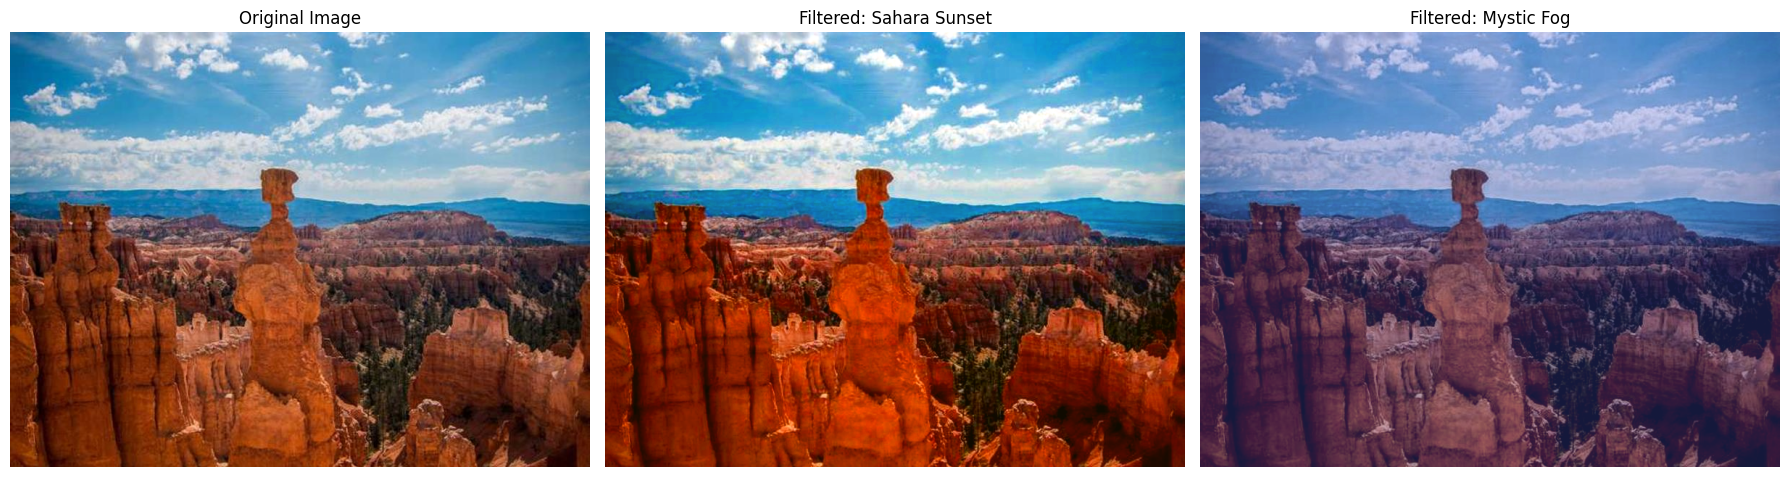

In [ ]:
# Ensure original_img_rgb is available from previous cells
# If you restart the kernel, you might need to re-run the image loading cell (eed3244e)
if 'original_img_rgb' not in locals():
    print("Warning: original_img_rgb not found. Please run the image loading cell first.")
    # Fallback to a dummy image for execution if original_img_rgb is not present
    original_img_rgb = np.array([[[255, 0, 0], [0, 255, 0]], [[0, 0, 255], [128, 128, 128]]], dtype=np.uint8)

# --- Apply and Display Filters ---

# Apply the "Sahara Sunset" filter
filtered_sahara = sahara_sunset_filter(original_img_rgb)

# Apply the "Mystic Fog" filter
filtered_mystic = mystic_fog_filter(original_img_rgb)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(original_img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(filtered_sahara)
plt.title('Filtered: Sahara Sunset')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_mystic)
plt.title('Filtered: Mystic Fog')
plt.axis('off')

plt.tight_layout()
plt.show()


## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

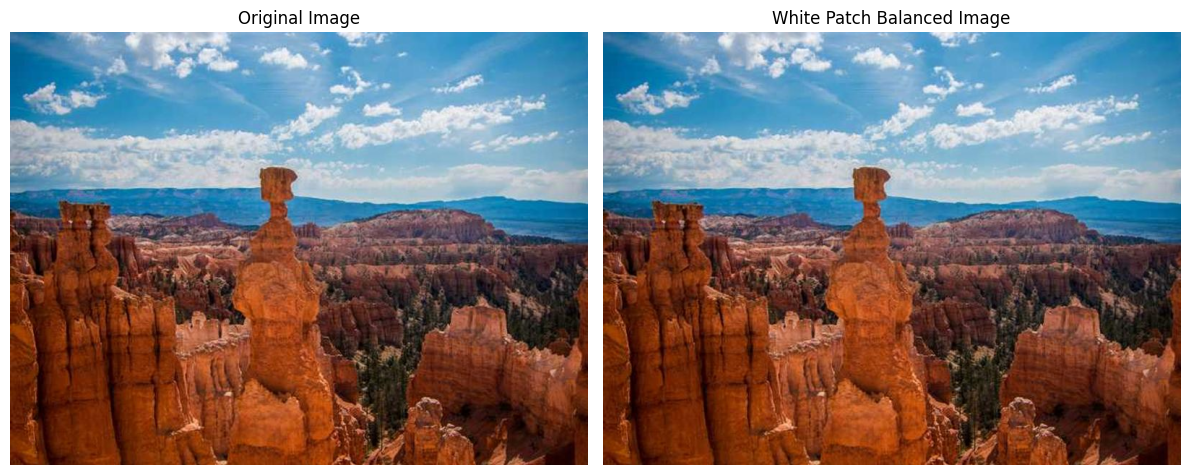

In [18]:
import numpy as np
import matplotlib.pyplot as plt
if 'original_img_rgb' not in locals():
    print("Warning: original_img_rgb not found. Please run the image loading cell first.")
    # Fallback to a dummy image for execution if original_img_rgb is not present
    original_img_rgb = np.array([[[255, 0, 0], [0, 255, 0]], [[0, 0, 255], [128, 128, 128]]], dtype=np.uint8)

def white_patch_balance(img_rgb):
    """
    Applies white patch color balancing to an RGB image.

    The white patch algorithm finds the brightest pixel value in each color channel
    and scales each channel independently so that these brightest values are maximized (255).

    Args:
        img_rgb (np.array): A 0-255 RGB image (height, width, 3).

    Returns:
        np.array: The white-patch-balanced 0-255 RGB image.
    """
    # Convert image to float32 for calculations to prevent clipping
    img_float = img_rgb.astype(np.float32)

    # Find the maximum intensity for each R, G, B channel
    max_r = np.max(img_float[..., 0])
    max_g = np.max(img_float[..., 1])
    max_b = np.max(img_float[..., 2])

    # Calculate scaling factors. If a max value is 0, set factor to 1 to avoid division by zero
    # and ensure black areas remain black.
    scale_r = 255.0 / max_r if max_r > 0 else 1.0
    scale_g = 255.0 / max_g if max_g > 0 else 1.0
    scale_b = 255.0 / max_b if max_b > 0 else 1.0

    # Apply scaling factors to each channel
    balanced_img = img_float.copy()
    balanced_img[..., 0] = balanced_img[..., 0] * scale_r
    balanced_img[..., 1] = balanced_img[..., 1] * scale_g
    balanced_img[..., 2] = balanced_img[..., 2] * scale_b

    # Clip values to ensure they stay within [0, 255] and convert back to uint8
    balanced_img = np.clip(balanced_img, 0, 255).astype(np.uint8)

    return balanced_img

# --- Test the white_patch_balance function ---

# Apply the white patch balance function
balanced_image = white_patch_balance(original_img_rgb)

# Display the original and balanced images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(balanced_image)
plt.title('White Patch Balanced Image')
plt.axis('off')

plt.tight_layout()
plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.